# Prepare Python Environment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [3]:
from google.colab import files
data_to_load = files.upload()

Saving pulse2021_puf_39.csv to pulse2021_puf_39.csv


In [4]:
import io
df_pulse = pd.read_csv(io.BytesIO(data_to_load['pulse2021_puf_39.csv']))

# **Cleaning Target Variable**

In [234]:

# replace missing values with NAN

df_pulse = df_pulse.replace({-99: None, -88: None})


# remove rows by filtering out missing responses for target variable:
# vaccine hesitancy


df_pulse = df_pulse[df_pulse['RECVDVACC'] != None]

In [235]:
# create dummy variable for already vaccinated
df_one = pd.get_dummies(df_pulse['RECVDVACC'], prefix = 'received_vacc')
 
# Binary Data is Concatenated into Dataframe
df_pulse = pd.concat((df_one, df_pulse), axis=1)

df_pulse = df_pulse.rename(columns={'received_vacc_2.0': 'not_vaccinated'})

df_pulse

,received_vacc_1.0,not_vaccinated,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,EGENID_BIRTH,AGENID_BIRTH,GENID_DESCRIBE,SEXUAL_ORIENTATION,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,KIDS_LT5Y,KIDS_5_11Y,KIDS_12_17Y,ENRPUBCHK,ENRPRVCHK,ENRHMSCHK,TENROLLPUB,TENROLLPRV,TENROLLHMSCH,ENROLLNONE,ACTVDUTY1,ACTVDUTY2,ACTVDUTY3,...,TH_CHLD_VID,PRVNTIVE,SEEING,HEARING,REMEMBERING,MOBILITY,TENURE,LIVQTRRV,RENTCUR,MORTCUR,MORTCONF,TMNTHSBHND,RENTASSIST,EVICT,FORCLOSE,ENERGY,HSE_TEMP,ENRGY_BILL,SUMMER_ED1,SUMMER_ED2,SUMMER_ED3,SUMMER_ED4,TNUM_PS,PSCHNG1,PSCHNG2,PSCHNG3,PSCHNG4,PSCHNG5,PSCHNG6,PSCHNG7,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME
0,1,0,V390000001S30010132000112,39,1,NaN,2,1560.107273,2950.831036,1955,2,1,2,1,2,4,2,1.0,1,2,1.0,2.0,2,2,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,1,0,V390000001S30010930100112,39,1,NaN,2,2015.111681,1905.719622,1955,2,1,2,1,2,4,2,1.0,2,2,2.0,NaN,4,2,3,2,1,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,V390000001S96010845500122,39,1,NaN,2,2916.377523,8274.178438,1999,2,1,2,4,2,4,2,5.0,2,2,2.0,3.0,3,2,0,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0
3,1,0,V390000001S98010895010122,39,1,NaN,2,989.102446,2806.224527,1935,2,1,2,1,2,7,2,1.0,1,2,1.0,2.0,3,2,0,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
4,1,0,V390000001S98010931110112,39,1,NaN,2,786.707174,1488.000207,1969,2,1,2,2,2,4,2,3.0,2,2,2.0,2.0,2,2,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,2.0,1.0,2.0,1.0,3.0,6.0,2.0,NaN,1.0,1.0,4.0,3.0,NaN,4.0,4.0,3.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57059,1,0,V399950006S50560830100012,39,46,NaN,3,299.803564,586.852713,1975,2,1,2,1,2,4,2,1.0,2,2,2.0,2.0,4,2,2,2,2,NaN,NaN,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
57060,0,1,V399950006S52560539010022,39,56,NaN,4,228.917122,425.001984,1975,2,2,2,1,2,7,2,1.0,2,2,2.0,2.0,4,2,2,2,2,NaN,1.0,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57061,1,0,V399950006S92560082500012,39,56,NaN,4,194.947742,361.935256,1944,2,1,2,1,2,6,2,1.0,2,2,2.0,2.0,2,2,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,2.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
57062,1,0,V399950006S92560347110022,39,27,NaN,3,152.367885,271.932838,1958,2,1,2,1,1,7,2,2.0,2,2,2.0,2.0,2,2,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,2.0,2.0,1.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,

In [236]:
# remove rows by filtering out missing responses for target variable:
# vaccine hesitancy
df_pulse = df_pulse[df_pulse['GETVACRV'] != None]

In [237]:
df_pulse = df_pulse[df_pulse['not_vaccinated'] != None]

In [238]:

# Classify vaccine hesitant for anything other than definitely getting a vaccine
# Use those that are vaccinated in the model

df_pulse['GETVACRV'] = np.where(df_pulse.GETVACRV > 2, 1, 0) 

df_pulse = df_pulse.rename(columns={'GETVACRV' : 'vacc_hesitant'})

#df_pulse['vacc_hesitant'] = np.where(df_pulse.not_vaccinated == 1, 1, 0) 

In [239]:
# percent of the data set that are vaccine hesitant

df_pulse['vacc_hesitant'].mean()

0.10891279966353568

# Initial Feature Selection

In [240]:
# pick variables that do not have significant missingness
minimal_feature_list = ['TBIRTH_YEAR', 'RHISPANIC','RRACE','EGENID_BIRTH','HADCOVID', 
                      'INCOME', 'EEDUC', 'EST_ST','vacc_hesitant']

# all cleaned variables
full_feature_list = ['TBIRTH_YEAR', 'RHISPANIC','RRACE','MS','EGENID_BIRTH',
                     'GENID_DESCRIBE', 'SEXUAL_ORIENTATION', 'HADCOVID', 
                     'WRKLOSSRV', 'ANYWORK', 'CTC_YN', 'ACTIVITY1', 'ACTIVITY2',
                     'ACTIVITY3', 'ACTIVITY4', 'ACTIVITY5', 'ACTIVITY6', 
                     'CURFOODSUF', 'SNAP_YN', 'ANXIOUS', 'WORRY', 'INTEREST',
                     'DOWN', 'PRESCRIPT', 'MH_SVCS', 'HLTHINS1', 'HLTHINS2',
                     'HLTHINS3', 'HLTHINS4', 'HLTHINS5', 'HLTHINS6', 'HLTHINS7',
                     'HLTHINS8', 'TELEHLTH', 'SEEING', 'HEARING', 'REMEMBERING',
                     'MOBILITY', 'RENTCUR', 'LIVQTRRV', 'MORTCUR', 'EVICT',
                     'FORCLOSE', 'INCOME', 'EEDUC', 'EST_ST','vacc_hesitant']

In [241]:
# create a bare-bones model
df_bare_bones = df_pulse[minimal_feature_list]



In [242]:
df_bare_bones['vacc_hesitant'].mean()

0.10891279966353568

In [243]:
sum([True for idx,row in df_bare_bones.iterrows() if any(row.isnull())])

12249

In [16]:
df_pulse = df_pulse[full_feature_list]

# Cleaning Descriptive Features for Bare Bones Model

In [244]:
# remove all rows containing NAs

df_bare_bones = df_bare_bones.dropna()

In [245]:
# change birth year to age
df_bare_bones['Age'] = 2021 - df_bare_bones['TBIRTH_YEAR']

df_bare_bones.drop(columns=['TBIRTH_YEAR'], axis=1, inplace= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [246]:
# create dummy variable for hispanic
df_two = pd.get_dummies(df_bare_bones['RHISPANIC'], drop_first= True,
                        prefix = 'hisp')
 
# Binary Data is Concatenated into Dataframe
df_bare_bones = pd.concat((df_two, df_bare_bones), axis=1)

df_bare_bones = df_bare_bones.rename(columns={'hisp_2' : 'Hispanic'})

df_bare_bones.drop(columns=['RHISPANIC'], axis=1, inplace= True)

df_bare_bones


,Hispanic,RRACE,EGENID_BIRTH,HADCOVID,INCOME,EEDUC,EST_ST,vacc_hesitant,Age
0,0,1,1,2.0,5.0,4,1,0,66
2,0,4,2,2.0,3.0,4,1,0,22
3,0,1,1,2.0,7.0,7,1,0,86
4,0,2,2,2.0,4.0,4,1,0,52
6,0,1,2,2.0,2.0,5,2,0,62
...,...,...,...,...,...,...,...,...,...
57058,0,1,1,2.0,4.0,6,56,0,80
57059,0,1,2,2.0,6.0,4,46,0,46
57061,0,1,2,2.0,5.0,6,56,0,77
57062,0,1,2,2.0,3.0,7,27,0,63


In [247]:
# create dummies for each race
df_three = pd.get_dummies(df_bare_bones['RRACE'], prefix= 'race')

# Binary Data is Concatenated into Dataframe
df_bare_bones = pd.concat((df_three, df_bare_bones), axis=1)

df_bare_bones = df_bare_bones.rename(columns={'race_1' : 'White', 'race_2' : 'Black',
                                    'race_3': 'Asian', 'race_4': 'Mixed'})

df_bare_bones.drop(columns=['RRACE'], axis=1, inplace= True)

df_bare_bones

,White,Black,Asian,Mixed,Hispanic,EGENID_BIRTH,HADCOVID,INCOME,EEDUC,EST_ST,vacc_hesitant,Age
0,1,0,0,0,0,1,2.0,5.0,4,1,0,66
2,0,0,0,1,0,2,2.0,3.0,4,1,0,22
3,1,0,0,0,0,1,2.0,7.0,7,1,0,86
4,0,1,0,0,0,2,2.0,4.0,4,1,0,52
6,1,0,0,0,0,2,2.0,2.0,5,2,0,62
...,...,...,...,...,...,...,...,...,...,...,...,...
57058,1,0,0,0,0,1,2.0,4.0,6,56,0,80
57059,1,0,0,0,0,2,2.0,6.0,4,46,0,46
57061,1,0,0,0,0,2,2.0,5.0,6,56,0,77
57062,1,0,0,0,0,2,2.0,3.0,7,27,0,63


In [248]:
# create dummy variable for birth gender
df_five = pd.get_dummies(df_bare_bones['EGENID_BIRTH'], drop_first= True,
                        prefix = 'bfemale')
 
# Binary Data is Concatenated into Dataframe
df_bare_bones = pd.concat((df_five, df_bare_bones), axis=1)

df_bare_bones = df_bare_bones.rename(columns={'bfemale_2' : 'born_female'})

df_bare_bones.drop(columns=['EGENID_BIRTH'], axis=1, inplace= True)
df_bare_bones

,born_female,White,Black,Asian,Mixed,Hispanic,HADCOVID,INCOME,EEDUC,EST_ST,vacc_hesitant,Age
0,0,1,0,0,0,0,2.0,5.0,4,1,0,66
2,1,0,0,0,1,0,2.0,3.0,4,1,0,22
3,0,1,0,0,0,0,2.0,7.0,7,1,0,86
4,1,0,1,0,0,0,2.0,4.0,4,1,0,52
6,1,1,0,0,0,0,2.0,2.0,5,2,0,62
...,...,...,...,...,...,...,...,...,...,...,...,...
57058,0,1,0,0,0,0,2.0,4.0,6,56,0,80
57059,1,1,0,0,0,0,2.0,6.0,4,46,0,46
57061,1,1,0,0,0,0,2.0,5.0,6,56,0,77
57062,1,1,0,0,0,0,2.0,3.0,7,27,0,63


In [249]:
# create a dummy variable for having contracted COVID-19 in the past
df_bare_bones['HADCOVID'] = np.where(df_bare_bones.HADCOVID < 1.5, 1, 0) 

df_bare_bones

,born_female,White,Black,Asian,Mixed,Hispanic,HADCOVID,INCOME,EEDUC,EST_ST,vacc_hesitant,Age
0,0,1,0,0,0,0,0,5.0,4,1,0,66
2,1,0,0,0,1,0,0,3.0,4,1,0,22
3,0,1,0,0,0,0,0,7.0,7,1,0,86
4,1,0,1,0,0,0,0,4.0,4,1,0,52
6,1,1,0,0,0,0,0,2.0,5,2,0,62
...,...,...,...,...,...,...,...,...,...,...,...,...
57058,0,1,0,0,0,0,0,4.0,6,56,0,80
57059,1,1,0,0,0,0,0,6.0,4,46,0,46
57061,1,1,0,0,0,0,0,5.0,6,56,0,77
57062,1,1,0,0,0,0,0,3.0,7,27,0,63


In [250]:
# add a variable for political affiliation
# using percent vote for Biden and Trump by state
# source: https://www.cnn.com/election/2020/results/president

def politics(x):
    if x == 1:
        return .62
    if x == 2:
        return .528
    if x == 4:
        return .49
    if x == 5:
        return .624
    if x == 6:
        return .343
    if x == 8:
        return .419
    if x == 9:
        return .392
    if x == 10:
        return .398
    if x == 11:
       return .054
    if x == 12:
        return .512
    if x == 13:
        return .492
    if x == 15:
        return .343
    if x == 16:
       return .638
    if x == 17:
       return .406
    if x == 18:
       return .57
    if x == 19:
       return .531
    if x == 20:
       return .561
    if x == 21:
        return .621
    if x == 22:
       return .585
    if x == 23:
       return .44
    if x == 24:
       return .321
    if x == 25:
        return .321
    if x == 26:
       return .478
    if x == 27:
        return .453
    if x == 28:
       return .575
    if x == 29:
       return .568
    if x == 30:
       return .569
    if x == 31:
       return .582
    if x == 32:
       return .477
    if x == 33:
       return .454
    if x == 34:
       return .413
    if x == 35:
       return .435
    if x == 36:
       return .377
    if x == 37:
       return .486
    if x == 38:
       return .651
    if x == 39:
       return .533
    if x == 40:
       return .654
    if x == 41:
       return .404
    if x == 42:
       return .488
    if x == 44:
       return .386
    if x == 45:
       return .551
    if x == 46:
       return .618
    if x == 47:
       return .607
    if x == 48:
       return .521
    if x == 49:
       return .581
    if x == 50:
       return .307
    if x == 51:
       return .44
    if x == 53:
       return .388
    if x == 54:
       return .686
    if x == 55:
       return .488
    if x == 56:
       return .699

# create new column based on percent vote for Trump in each state
df_bare_bones['pct_vote_Trump'] = df_bare_bones['EST_ST'].apply(politics)

In [251]:
df_bare_bones

,born_female,White,Black,Asian,Mixed,Hispanic,HADCOVID,INCOME,EEDUC,EST_ST,vacc_hesitant,Age,pct_vote_Trump
0,0,1,0,0,0,0,0,5.0,4,1,0,66,0.620
2,1,0,0,0,1,0,0,3.0,4,1,0,22,0.620
3,0,1,0,0,0,0,0,7.0,7,1,0,86,0.620
4,1,0,1,0,0,0,0,4.0,4,1,0,52,0.620
6,1,1,0,0,0,0,0,2.0,5,2,0,62,0.528
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57058,0,1,0,0,0,0,0,4.0,6,56,0,80,0.699
57059,1,1,0,0,0,0,0,6.0,4,46,0,46,0.618
57061,1,1,0,0,0,0,0,5.0,6,56,0,77,0.699
57062,1,1,0,0,0,0,0,3.0,7,27,0,63,0.453


# Bare Bones Model EDA

Text(0.5, 1.0, 'Figure A: Unbalanced Data Set')

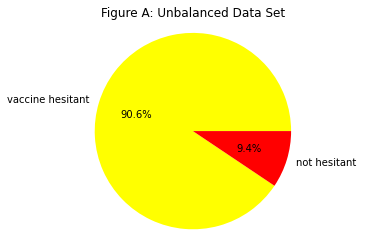

In [252]:
# Make a pie chart showing hesitancy
fig, ax = plt.subplots(1, 1)
ax.pie(df_bare_bones.vacc_hesitant.value_counts(),autopct='%1.1f%%', 
       labels=['vaccine hesitant','not hesitant'], colors=['yellow','red'])
plt.axis('equal')
plt.ylabel('')
plt.title('Figure A: Unbalanced Data Set')

## Create a balanced data set

In [253]:
#indices corresponding to fraud transaction
hesitant_indices = np.array(df_bare_bones[df_bare_bones.vacc_hesitant == 1].index) 
#indices corresponding to genuine transaction
not_hesitant_ind = df_bare_bones[df_bare_bones.vacc_hesitant == 0].index
# total vaccine hesitant people
total_hesitant = len(df_bare_bones[df_bare_bones.vacc_hesitant == 1]) 
np.random.seed(0) # fix the random seed generator for consistent results
# down sample
not_hesitant_ind = np.random.choice(not_hesitant_ind, total_hesitant, replace = False)
not_hesitant_ind = np.array(not_hesitant_ind)
 # indices for balanced data
selected_balanced_indices = np.concatenate([not_hesitant_ind,hesitant_indices])
df_bare_bones = df_bare_bones.loc[selected_balanced_indices]


Text(0.5, 1.0, 'Figure B: Balanced Data Set')

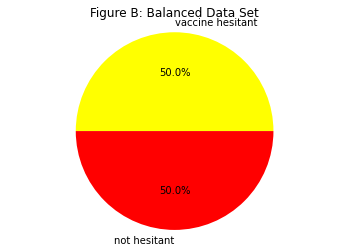

In [254]:
# Make a pie chart showing vaccination opinions
fig, ax = plt.subplots(1, 1)
ax.pie(df_bare_bones.vacc_hesitant.value_counts(),autopct='%1.1f%%', 
       labels=['vaccine hesitant','not hesitant'], colors=['yellow','red'])
plt.axis('equal')
plt.ylabel('')
plt.title('Figure B: Balanced Data Set')

In [28]:
df_bare_bones

,born_female,White,Black,Asian,Mixed,Hispanic,HADCOVID,INCOME,EEDUC,EST_ST,vacc_hesitant,Age,pct_vote_Trump
24415,1,1,0,0,0,0,0,7.0,6,6,0,40,0.343
47416,0,0,0,0,1,0,0,2.0,5,6,0,64,0.343
45609,0,1,0,0,0,0,0,8.0,7,37,0,70,0.486
29821,0,1,0,0,0,0,0,8.0,6,34,0,62,0.413
37520,1,1,0,0,0,0,0,5.0,3,21,0,43,0.621
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56923,1,1,0,0,0,0,1,1.0,4,46,1,68,0.618
56924,1,1,0,0,0,0,0,1.0,6,46,1,44,0.618
56926,1,0,0,0,1,0,0,1.0,4,46,1,18,0.618
56947,1,0,0,0,1,0,0,5.0,6,49,1,40,0.581


In [29]:
# import functions to plot distributions of continuous variables
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0.5, 1.0, 'Figure C')]

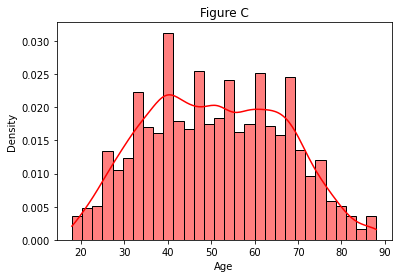

In [255]:
# plot age
sns.histplot(df_bare_bones['Age'],bins=30,color='red',stat="density",
             kde=True).set(title = 'Figure C')

Age is distributed roughly normally. 

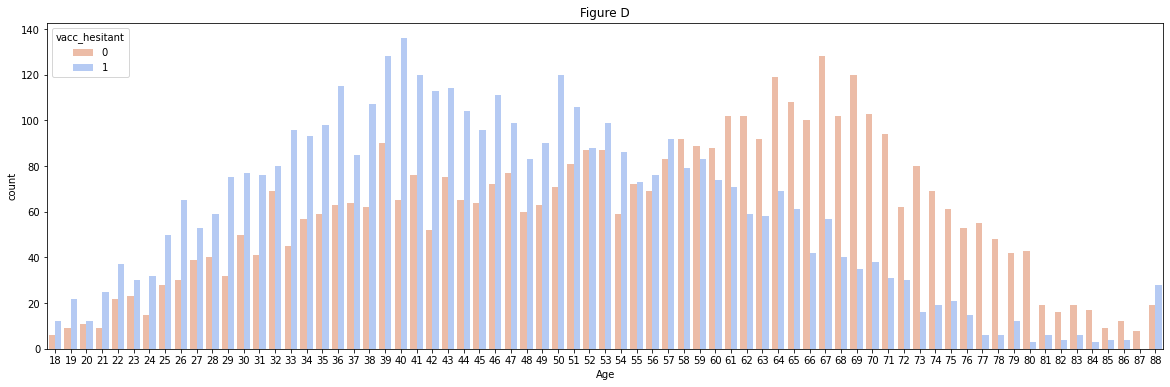

In [256]:
# let's see age broken down by the target variable
plt.figure(figsize=(20,6))
sns.countplot(x='Age',data = df_bare_bones, hue = 'vacc_hesitant',
              palette='coolwarm_r').set(title = 'Figure D')
plt.show()

When broken down by hesitancy, age has a clear bimodal distribution

[Text(0.5, 1.0, 'Figure E')]

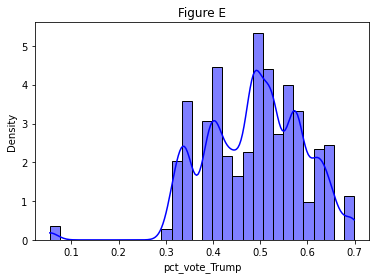

In [257]:
sns.histplot(df_bare_bones['pct_vote_Trump'],bins=30,color='blue',stat="density",
             kde=True).set(title = 'Figure E')

Percent vote for Trump is also roughly ditributed normally, with the outlier of Washington DC, which has a small population. A very low percentage of the vote share in DC went to Trump, but because so few people live in DC, this may be skewing our sample.

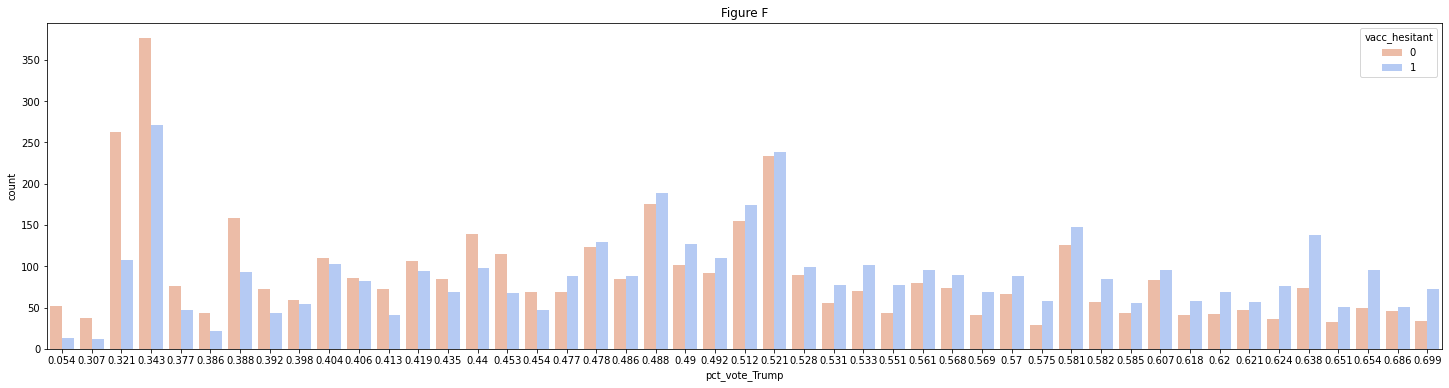

In [258]:
# let's see percent vote for Trump broken down by the target variable
plt.figure(figsize=(25,6))
sns.countplot(x='pct_vote_Trump',data = df_bare_bones, hue = 'vacc_hesitant',
              palette='coolwarm_r').set(title = 'Figure F')
plt.show()

Approximately normal with divergence at the tails.

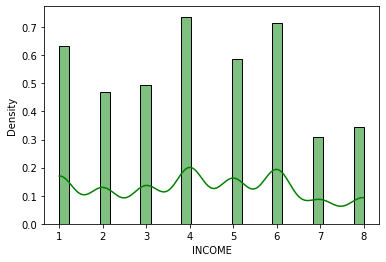

In [34]:
# plot income
sns.histplot(df_bare_bones['INCOME'],bins=30,color='green',stat="density",
             kde=True)

Income is fairly evenly distributed but definitely skewed to the right. 

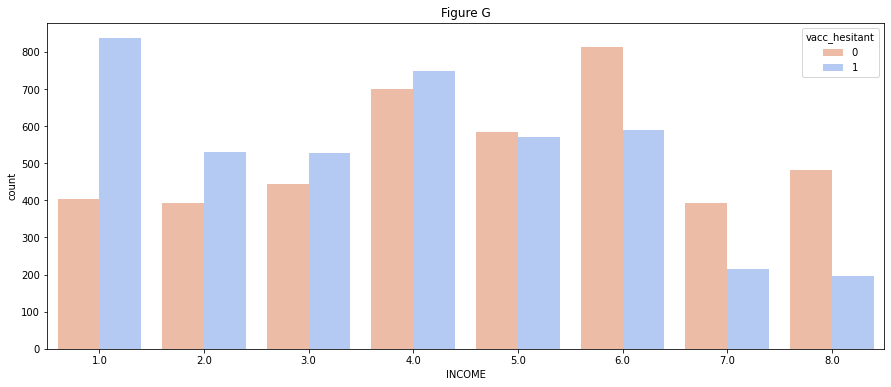

In [259]:
# let's see income broken down by the target variable
plt.figure(figsize=(15,6))
sns.countplot(x='INCOME',data = df_bare_bones, hue = 'vacc_hesitant',
              palette='coolwarm_r').set(title = 'Figure G')
plt.show()

Approximately normal with divergence at the tails.

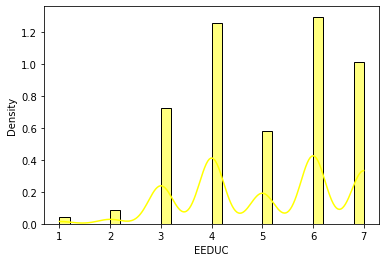

In [36]:
# plot education level
sns.histplot(df_bare_bones['EEDUC'],bins=30,color='yellow',stat="density",kde=True)

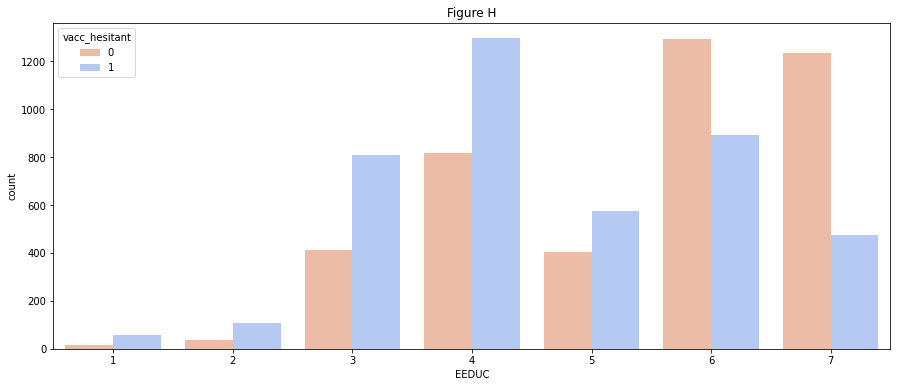

In [260]:
# let's see education level broken down by the target variable
plt.figure(figsize=(15,6))
sns.countplot(x='EEDUC',data = df_bare_bones, hue = 'vacc_hesitant',
              palette='coolwarm_r').set(title = 'Figure H')
plt.show()

Education level is roughly normally distributed but skewed to the left. 

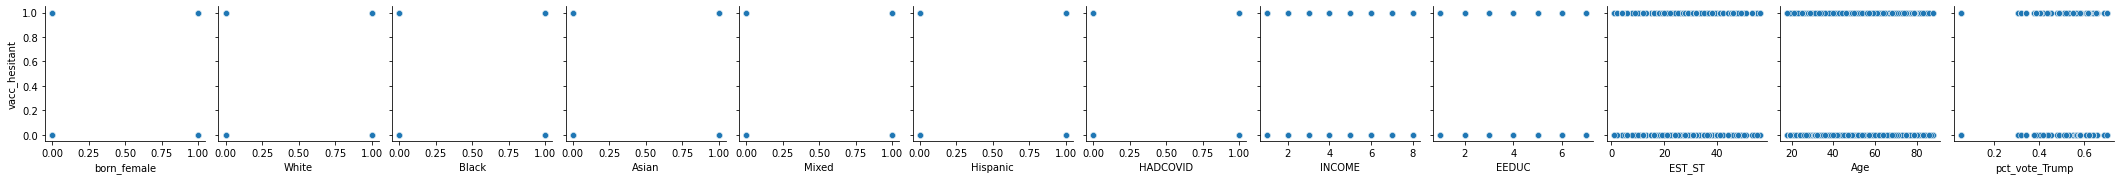

In [38]:
# Seaborn visualization library
import seaborn as sns

# visualize feature label pairs
# create the pairplot
# sns.pairplot(boston_df)
sns.pairplot(df_bare_bones, x_vars = df_bare_bones.iloc[:, np.r_[0:10, 11:13]], 
             y_vars=["vacc_hesitant"])

It is difficult to gauge relationships from pairplots of binary variables. There appears to be a positive relationship between vaccine hesitancy and percent vote for Trump.

In [39]:
## Compute the correlation matrix
df_bare_bones.corr()

,born_female,White,Black,Asian,Mixed,Hispanic,HADCOVID,INCOME,EEDUC,EST_ST,vacc_hesitant,Age,pct_vote_Trump
born_female,1.000000,-0.004934,0.059477,-0.054321,-0.015457,-0.014720,0.018399,-0.138269,-0.016556,0.014038,0.002893,-0.065140,0.008188
White,-0.004934,1.000000,-0.629212,-0.430612,-0.546654,-0.047865,-0.002564,0.099842,0.021159,0.083008,0.004056,0.084211,0.138336
Black,0.059477,-0.629212,1.000000,-0.057684,-0.073228,-0.015732,0.013984,-0.128146,-0.035777,-0.045620,0.019059,-0.058239,-0.079513
Asian,-0.054321,-0.430612,-0.057684,1.000000,-0.050115,-0.005278,-0.045766,0.068706,0.082575,-0.052780,-0.106795,-0.003235,-0.136061
Mixed,-0.015457,-0.546654,-0.073228,-0.050115,1.000000,0.098801,0.025212,-0.070854,-0.060105,-0.039108,0.058053,-0.066724,-0.022469
Hispanic,-0.014720,-0.047865,-0.015732,-0.005278,0.098801,1.000000,0.039714,-0.077219,-0.096897,-0.066613,0.033547,-0.098517,-0.082488
HADCOVID,0.018399,-0.002564,0.013984,-0.045766,0.025212,0.039714,1.000000,-0.025215,-0.059333,-0.003892,0.227944,-0.117600,0.107117
INCOME,-0.138269,0.099842,-0.128146,0.068706,-0.070854,-0.077219,-0.025215,1.000000,0.424941,-0.022320,-0.210979,0.051227,-0.112698
EEDUC,-0.016556,0.021159,-0.035777,0.082575,-0.060105,-0.096897,-0.059333,0.424941,1.000000,-0.016796,-0.286029,0.120362,-0.103434
EST_ST,0.014038,0.083008,-0.045620,-0.052780,-0.039108,-0.066613,-0.003892,-0.022320,-0.016796,1.000000,0.003212,-0.016462,0.232792


Highest correlations with the target variable are: age, education level, income, had covid, pct vote Trump, and Asian. 

### Extract target and descriptive features

In [261]:
# Store all the features from the data in X
X= df_bare_bones.iloc[:, np.r_[0:10, 11:13]]
# Store all the labels in y
y = df_bare_bones['vacc_hesitant']

In [262]:
# Convert data to numpy array
X = X.to_numpy()
y = y.to_numpy()

### Perform test-train split



In [263]:
# import function
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,
                                                 random_state=5 )

X_train,X_val,y_train,y_val = train_test_split(X_train, y_train,test_size = 0.2,
                                                 random_state=5 )

## Train a Decision Tree Classifier

In [43]:
# import packages
from sklearn.tree import DecisionTreeClassifier

# tree visualization helper function 
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score 

"""
clf: DecisionTreeClassifier

Returns a bytes object representing the image of the tree 
"""
def get_tree_image(clf):
    dot_data = StringIO()
    feature_names= df_bare_bones.drop('vacc_hesitant',axis=1).columns
    class_names=["Vaccine Accepting", "Vaccine Hesitant"]
    export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,
                    feature_names=feature_names, 
                    class_names=class_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    

    return graph.create_png()

In [44]:
# try gini criterion with a max depth of five to permit visualization
DTC_gini = DecisionTreeClassifier(criterion='gini', random_state=5)
DTC_gini.fit(X_train,y_train)
DTC_gini.score(X_train,y_train)


0.9966617210682492

In [45]:
DTC_gini.score(X_val,y_val)

0.5875370919881305

In [46]:
# train an entropy model
DTC_entropy = DecisionTreeClassifier(criterion='entropy', random_state=5, 
                                     max_depth=3)
DTC_entropy.fit(X_train,y_train)
DTC_entropy.score(X_train,y_train)

0.704933234421365

In [47]:
DTC_entropy.score(X_val,y_val)

0.7054896142433235

### Visualize the Tree

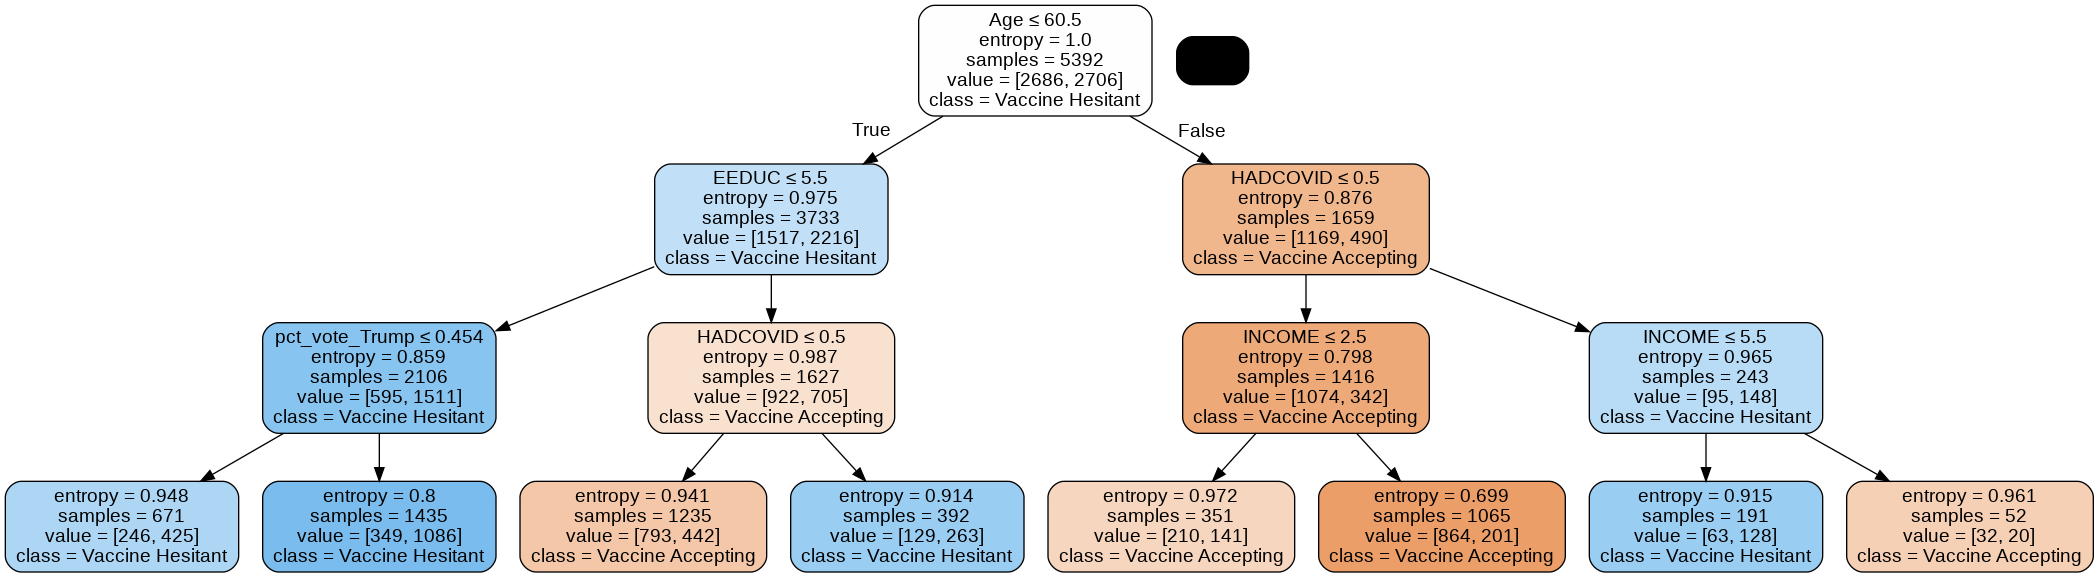

In [48]:
# use the best classifier with a max depth of five
best_clf= DTC_entropy
tree_image=get_tree_image(best_clf)
Image(tree_image)


### Try different depths for the Decision Tree Classifier

In [49]:
DTC_entropy_0 = DecisionTreeClassifier(criterion='entropy', random_state=5,
                                       max_depth=None)
DTC_entropy_0.fit(X_train,y_train)
DTC_entropy_0.score(X_train,y_train)

0.9966617210682492

In [50]:
DTC_entropy_0.score(X_val, y_val)

0.6038575667655787

In [51]:
DTC_entropy_1 = DecisionTreeClassifier(criterion='entropy', random_state=5,
                                       max_depth=1)
DTC_entropy_1.fit(X_train,y_train)
DTC_entropy_1.score(X_train,y_train)

0.6277818991097923

In [52]:
DTC_entropy_1.score(X_val, y_val)

0.6097922848664689

In [53]:
DTC_entropy_3 = DecisionTreeClassifier(criterion='entropy', random_state=5,
                                       max_depth=3)
DTC_entropy_3.fit(X_train,y_train)
DTC_entropy_3.score(X_train,y_train)

0.704933234421365

In [54]:
DTC_entropy_3.score(X_val, y_val)

0.7054896142433235

In [55]:
DTC_entropy_5 = DecisionTreeClassifier(criterion='entropy', random_state=5,
                                       max_depth=5)
DTC_entropy_5.fit(X_train,y_train)
DTC_entropy_5.score(X_train,y_train)

0.712166172106825

In [56]:
DTC_entropy_5.score(X_val, y_val)

0.6973293768545994

In [57]:
DTC_entropy_3.score(X_test, y_test)

0.7058125741399762

In [58]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, DTC_entropy_3.predict
                                  (X_test)).ravel()
(tn, fp, fn, tp)

(608, 240, 256, 582)

## Learn an ensemble of decision trees

In [59]:
# Import functions
from sklearn.ensemble import RandomForestClassifier

In [60]:
# train a Random Forest Classifier using 10 estimators
RFC_10 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                               random_state = 5)
RFC_10.fit(X_train,y_train)
RFC_10.score(X_train,y_train)

0.9758902077151336

In [61]:
RFC_10.score(X_val, y_val)

0.6624629080118695

In [62]:
# train using 100 estimators
RFC_100 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',
                                 random_state = 5)
RFC_100.fit(X_train,y_train)
RFC_100.score(X_train, y_train)

0.9966617210682492

In [63]:
RFC_100.score(X_val, y_val)

0.6654302670623146

In [64]:
RFC_3 = RandomForestClassifier(n_estimators = 500, criterion = 'entropy',
                               random_state = 5)
RFC_3.fit(X_train,y_train)
RFC_3.score(X_train, y_train)

0.9966617210682492

In [65]:
RFC_3.score(X_val, y_val)

0.6706231454005934

In [66]:
RFC_1000 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy',
                               random_state = 5)
RFC_1000.fit(X_train,y_train)
RFC_1000.score(X_train, y_train)

0.9966617210682492

In [67]:
RFC_1000.score(X_val, y_val)

0.6706231454005934

In [68]:
RFC_2000 = RandomForestClassifier(n_estimators = 2000, criterion = 'entropy',
                               random_state = 5)
RFC_2000.fit(X_train,y_train)
RFC_2000.score(X_train, y_train)

0.9966617210682492

In [69]:
RFC_2000.score(X_val, y_val)

0.6750741839762612

In [70]:
RFC_2000.score(X_test, y_test)

0.6826809015421115

In [71]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, RFC_2000.predict(X_test)).ravel()
(tn, fp, fn, tp)

(566, 282, 253, 585)

## Gradient Boosting Classifier

In [264]:
from sklearn.ensemble import GradientBoostingClassifier


In [73]:
GBC_1 = GradientBoostingClassifier(n_estimators = 5, n_iter_no_change = 100, 
                                   validation_fraction=0.2,  random_state = 5)
GBC_1.fit(X_train,y_train)
GBC_1.score(X_train,y_train)

0.7040059347181009

In [74]:
GBC_1.score(X_val,y_val)

0.6973293768545994

In [75]:
GBC_2 = GradientBoostingClassifier(n_estimators = 50, n_iter_no_change = 100,
                                   validation_fraction=0.2,  random_state = 5)
GBC_2.fit(X_train,y_train)
GBC_2.score(X_train,y_train)

0.7203264094955489

In [76]:
GBC_2.score(X_val, y_val)

0.7143916913946587

In [77]:
GBC_3 = GradientBoostingClassifier(n_estimators = 100, n_iter_no_change = 100, validation_fraction=0.2,  random_state = 5)
GBC_3.fit(X_train,y_train)
GBC_3.score(X_train,y_train)

0.7299703264094956

In [78]:
GBC_3.score(X_val,y_val)

0.7143916913946587

In [79]:
GBC_4 = GradientBoostingClassifier(n_estimators = 200, n_iter_no_change = 100, validation_fraction=0.2,  random_state = 5)
GBC_4.fit(X_train,y_train)
GBC_4.score(X_train,y_train)

0.7360905044510386

In [80]:
GBC_4.score(X_val,y_val)

0.7129080118694362

In [81]:
for k in [1,5,50,100,200,400,800]:
  GBC = GradientBoostingClassifier(n_estimators = k, n_iter_no_change = 100, 
                                   validation_fraction=0.2,  random_state = 5)
  GBC_fitted = GBC.fit(X_train, y_train)
  y_pred_train = GBC_fitted.predict(X_train)
  y_pred_test = GBC_fitted.predict(X_val)
  print('%i estimators train accuracy: %.4f' %(k,accuracy_score(y_train,y_pred_train)))
  print('%i estimators test accuracy: %.4f' %(k,accuracy_score(y_val,y_pred_test)))

1 estimators train accuracy: 0.7027
1 estimators test accuracy: 0.6981
5 estimators train accuracy: 0.7040
5 estimators test accuracy: 0.6973
50 estimators train accuracy: 0.7203
50 estimators test accuracy: 0.7144
100 estimators train accuracy: 0.7300
100 estimators test accuracy: 0.7144
200 estimators train accuracy: 0.7361
200 estimators test accuracy: 0.7129
400 estimators train accuracy: 0.7361
400 estimators test accuracy: 0.7129
800 estimators train accuracy: 0.7361
800 estimators test accuracy: 0.7129


In [265]:
GBC_best = GradientBoostingClassifier(n_estimators = 100, n_iter_no_change = 100, 
                                   validation_fraction=0.2,  random_state = 5)
GBC_best.fit(X_train, y_train)
GBC_best.score(X_test, y_test)

0.7075919335705813

In [266]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, GBC_best.predict(X_test)).ravel()
(tn, fp, fn, tp)

(594, 254, 239, 599)

## KNN Model

In [84]:
# learn a k-nearest neighbor model

from sklearn.neighbors import KNeighborsClassifier


# 1NN
NN1 = KNeighborsClassifier(n_neighbors= 1)
NN1.fit(X_train,y_train)
NN1.score(X_train,y_train)

0.9964762611275965

In [85]:
NN1.score(X_val,y_val)

0.5749258160237388

In [86]:
#3NN
NN3 = KNeighborsClassifier(n_neighbors= 3)
NN3.fit(X_train,y_train)
NN3.score(X_train,y_train)

0.8026706231454006

In [87]:
NN3.score(X_val, y_val)

0.5986646884272997

In [88]:
# 5NN
NN5 = KNeighborsClassifier(n_neighbors= 5)
NN5.fit(X_train,y_train)
NN5.score(X_train,y_train)

0.7609421364985163

In [89]:
NN5.score(X_val, y_val)

0.6120178041543026

In [90]:
# 25NN
NN25 = KNeighborsClassifier(n_neighbors= 25)
NN25.fit(X_train,y_train)
NN25.score(X_train,y_train)

0.6897255192878339

In [91]:
NN25.score(X_val, y_val)

0.6528189910979229

### Let's try a weighted KNN

In [92]:
# 5NN
WNN5 = KNeighborsClassifier(n_neighbors= 5, weights= 'distance')
WNN5.fit(X_train,y_train)
WNN5.score(X_train,y_train)

0.9966617210682492

In [93]:
WNN5.score(X_val, y_val)

0.6053412462908012

In [94]:
# 25NN
WNN25 = KNeighborsClassifier(n_neighbors= 25, weights = 'distance')
WNN25.fit(X_train,y_train)
WNN25.score(X_train,y_train)

0.9966617210682492

In [95]:
WNN25.score(X_val, y_val)

0.6498516320474778

In [96]:
# 100NN
WNN100 = KNeighborsClassifier(n_neighbors= 100, weights = 'distance')
WNN100.fit(X_train,y_train)
WNN100.score(X_train,y_train)

0.9966617210682492

In [97]:
WNN100.score(X_val, y_val)

0.6594955489614244

In [98]:
# 200NN
WNN200 = KNeighborsClassifier(n_neighbors= 200, weights = 'distance')
WNN200.fit(X_train,y_train)
WNN200.score(X_train,y_train)

0.9966617210682492

In [99]:
WNN200.score(X_val, y_val)

0.650593471810089

In [100]:
NN25.score(X_test, y_test)

0.6743772241992882

In [101]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, NN25.predict(X_test)).ravel()
(tn, fp, fn, tp)

(551, 297, 252, 586)

## Train a logistic classifier

In [102]:
# import packages
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [268]:
# pre-process the data
# Define the scaler for scaling the data


scaler = preprocessing.StandardScaler().fit(X_train)

# Normalize the training data
X_train_scaled = scaler.transform(X_train)

# Use the scaler defined above to standardize the validation data by applying
# the same transformation to the validation data.
X_val_scaled = scaler.transform(X_val)

In [104]:
glm = LogisticRegression()


# source: https://machinelearningmastery.com/hyperparameter-optimization-with
# -random-search-and-grid-search/

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

# define search
search = RandomizedSearchCV(glm, space, n_iter=500, scoring='accuracy',
                            n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: 0.6972058348994666
Best Hyperparameters: {'C': 0.15490420918251357, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3540 fits failed out of a total of 7500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
795 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [269]:
glm_best = LogisticRegression(penalty = 'l2', solver = 'liblinear')
glm_best.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [270]:
X_test_scaled = scaler.transform(X_test)

glm_best.score(X_test_scaled, y_test)

0.7004744958481613

In [271]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, glm_best.predict(X_test_scaled)).ravel()
(tn, fp, fn, tp)

(603, 245, 260, 578)

## Train a Support Vector Machine

In [272]:
# Linear SVC

from sklearn.svm import LinearSVC

# doesn't converge initially; try more iterations

linear_svm10k = LinearSVC(max_iter= 10000)
linear_svm10k.fit(X_train_scaled, y_train)
linear_svm10k.score(X_train_scaled, y_train)

0.6952893175074184

In [273]:
linear_svm10k.score(X_val_scaled, y_val)

0.6899109792284867

In [110]:
#100k iterations
linear_svm100k = LinearSVC(max_iter= 100000)
linear_svm100k.fit(X_train_scaled, y_train)
linear_svm100k.score(X_train_scaled, y_train)

0.6952893175074184

In [111]:
linear_svm100k.score(X_val_scaled, y_val)

0.6899109792284867

In [274]:
linear_svm10k.score(X_test_scaled, y_test)

0.6998813760379596

In [275]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, linear_svm10k.predict(X_test_scaled)).ravel()
(tn, fp, fn, tp)

(604, 244, 262, 576)

## Neural Net

In [114]:
# sources: precept and https://www.tensorflow.org/guide/keras/train_and_evaluate/

# import tensor flow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(keras.Input(shape=(None,12)))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(2, activation= 'softmax'))


model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)


In [115]:
# fit the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=5,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),
)

# return history object

history.history

Epoch 1/5
169/169 [==============================] - 1s 3ms/step - loss: 0.6966 - sparse_categorical_accuracy: 0.5516 - val_loss: 0.6676 - val_sparse_categorical_accuracy: 0.5898
Epoch 2/5
169/169 [==============================] - 0s 2ms/step - loss: 0.6694 - sparse_categorical_accuracy: 0.5838 - val_loss: 0.6575 - val_sparse_categorical_accuracy: 0.5957
Epoch 3/5
169/169 [==============================] - 0s 2ms/step - loss: 0.6620 - sparse_categorical_accuracy: 0.6020 - val_loss: 0.6488 - val_sparse_categorical_accuracy: 0.6269
Epoch 4/5
169/169 [==============================] - 0s 2ms/step - loss: 0.6530 - sparse_categorical_accuracy: 0.6109 - val_loss: 0.6404 - val_sparse_categorical_accuracy: 0.6313
Epoch 5/5
169/169 [==============================] - 0s 2ms/step - loss: 0.6462 - sparse_categorical_accuracy: 0.6306 - val_loss: 0.6316 - val_sparse_categorical_accuracy: 0.6417


{'loss': [0.696613609790802,
  0.6694290637969971,
  0.6620457172393799,
  0.6529912948608398,
  0.6462266445159912],
 'sparse_categorical_accuracy': [0.5515578389167786,
  0.5838279128074646,
  0.6020029783248901,
  0.6109050512313843,
  0.6305637955665588],
 'val_loss': [0.6676403284072876,
  0.6575095057487488,
  0.6487796902656555,
  0.640376627445221,
  0.6316157579421997],
 'val_sparse_categorical_accuracy': [0.5897626280784607,
  0.5956973433494568,
  0.6268545985221863,
  0.6313056349754333,
  0.6416913866996765]}

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# ROC Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

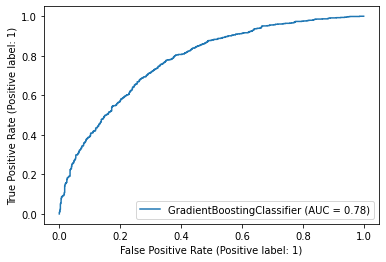

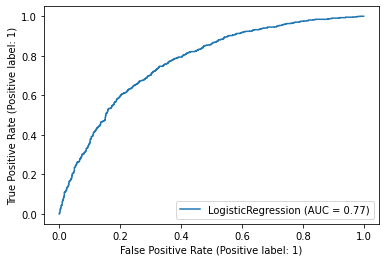

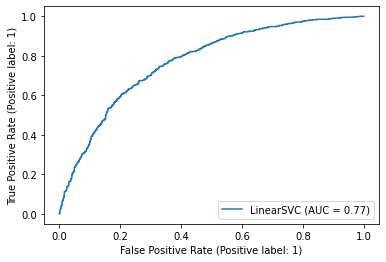

In [277]:
# construct ROC curve

# import fucntions

import matplotlib.pyplot as plt
from sklearn import metrics

# plot using the curve that minimizes false negatives
metrics.plot_roc_curve(GBC_best, X_test, y_test) 

metrics.plot_roc_curve(glm_best, X_test_scaled, y_test)

metrics.plot_roc_curve(linear_svm10k, X_test_scaled, y_test)

## Feature Importances

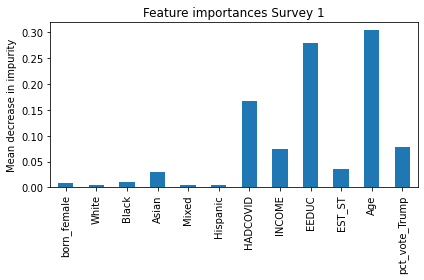

In [279]:
importances = GBC_best.feature_importances_

feature_names = ['born_female',	'White',	'Black',	'Asian',	'Mixed',
                 'Hispanic',	'HADCOVID',	'INCOME',	'EEDUC',	'EST_ST',
                 'Age',	'pct_vote_Trump']
GBC_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
GBC_importances.plot.bar(ax=ax)
ax.set_title("Feature importances Survey 1")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Visualize High Dimensional Data

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


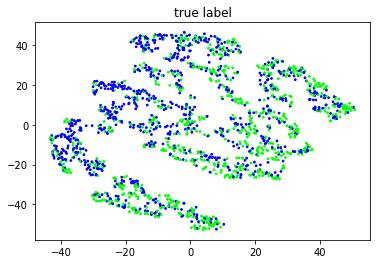

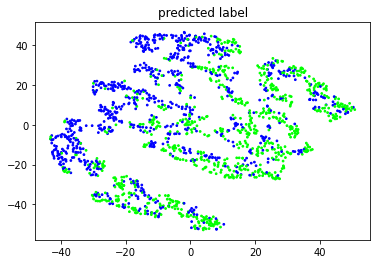

In [121]:
from matplotlib.cm import get_cmap
from sklearn.manifold import TSNE

# embed to 2-dim space
X_test_emb = TSNE().fit_transform(X_test)

# color map for each label
cmap = get_cmap('brg', 2)

# plot with each class being the same color
plt.scatter(X_test_emb[:,0], X_test_emb[:,1], s=3, color=cmap(y_test))
plt.title('true label')
plt.show()

pred = GBC_best.predict(X_test)

plt.scatter(X_test_emb[:,0], X_test_emb[:,1], s=3, color=cmap(pred))
plt.title('predicted label')
plt.show()

## **why doesn't gradient boosting send them to 0?**

# Survey #2

In [122]:
from google.colab import files
data_to_load = files.upload()



Saving pulse2021_puf_37.csv to pulse2021_puf_37.csv


In [123]:
import io
df_pulse2 = pd.read_csv(io.BytesIO(data_to_load['pulse2021_puf_37.csv']))

In [124]:
# cleaning

# create dummy variable for already vaccinated
df_one = pd.get_dummies(df_pulse2['RECVDVACC'], prefix = 'received_vacc')
 
# Binary Data is Concatenated into Dataframe
df_pulse2 = pd.concat((df_one, df_pulse2), axis=1)

df_pulse2 = df_pulse2.rename(columns={'received_vacc_2': 'not_vaccinated'})


# replace missing values with NAN

df_pulse2 = df_pulse2.replace({-99: None, -88: None})



# remove rows by filtering out missing responses for target variable:
# vaccine hesitancy
df_pulse2 = df_pulse2[(df_pulse2['GETVACRV'] != None)]

# remove those who did not respond regarding how hesitant

df_pulse2 = df_pulse2[df_pulse2['not_vaccinated'] != None]

# Classify vaccine hesitant for anything other than definitely getting a vaccine
# include the vaccinated 


df_pulse2['GETVACRV'] = np.where(df_pulse2['GETVACRV'] > 1.5, 1, 0) 

df_pulse2 = df_pulse2.rename(columns={'GETVACRV' : 'vacc_hesitant'})

df_pulse2['vacc_hesitant'] = np.where(df_pulse2.not_vaccinated == 1, 1, 0) 



# use a bare bones model
df_bare_bones = df_pulse2[minimal_feature_list]


# remove all rows containing NAs

df_bare_bones = df_bare_bones.dropna()


# change birth year to age
df_bare_bones['Age'] = 2021 - df_bare_bones['TBIRTH_YEAR']

df_bare_bones.drop(columns=['TBIRTH_YEAR'], axis=1, inplace= True)


# create dummy variable for hispanic
df_two = pd.get_dummies(df_bare_bones['RHISPANIC'], drop_first= True,
                        prefix = 'hisp')
 
# Binary Data is Concatenated into Dataframe
df_bare_bones = pd.concat((df_two, df_bare_bones), axis=1)

df_bare_bones = df_bare_bones.rename(columns={'hisp_2' : 'Hispanic'})

df_bare_bones.drop(columns=['RHISPANIC'], axis=1, inplace= True)



# create dummies for each race
df_three = pd.get_dummies(df_bare_bones['RRACE'], prefix= 'race')

# Binary Data is Concatenated into Dataframe
df_bare_bones = pd.concat((df_three, df_bare_bones), axis=1)

df_bare_bones = df_bare_bones.rename(columns={'race_1' : 'White', 'race_2' : 'Black',
                                    'race_3': 'Asian', 'race_4': 'Mixed'})

df_bare_bones.drop(columns=['RRACE'], axis=1, inplace= True)


# create dummy variable for birth gender
df_five = pd.get_dummies(df_bare_bones['EGENID_BIRTH'], drop_first= True,
                        prefix = 'bfemale')
 
# Binary Data is Concatenated into Dataframe
df_bare_bones = pd.concat((df_five, df_bare_bones), axis=1)

df_bare_bones = df_bare_bones.rename(columns={'bfemale_2' : 'born_female'})

df_bare_bones.drop(columns=['EGENID_BIRTH'], axis=1, inplace= True)

# create a dummy variable for had COVID-19 in the past

df_bare_bones['HADCOVID'] = np.where(df_bare_bones.HADCOVID < 1.5, 1, 0) 

# assign political affiliation using previously defined function
df_bare_bones['pct_vote_Trump'] = df_bare_bones['EST_ST'].apply(politics)







## Balance the data

In [125]:
#indices corresponding to fraud transaction
hesitant_indices = np.array(df_bare_bones[df_bare_bones.vacc_hesitant == 1].index) 
#indices corresponding to genuine transaction
not_hesitant_ind = df_bare_bones[df_bare_bones.vacc_hesitant == 0].index
# total vaccine hesitant people
total_hesitant = len(df_bare_bones[df_bare_bones.vacc_hesitant == 1]) 
np.random.seed(0) # fix the random seed generator for consistent results
# down sample
not_hesitant_ind = np.random.choice(not_hesitant_ind, total_hesitant, replace = False)
not_hesitant_ind = np.array(not_hesitant_ind)
 # indices for balanced data
selected_balanced_indices = np.concatenate([not_hesitant_ind,hesitant_indices])
df_bare_bones = df_bare_bones.loc[selected_balanced_indices]


In [126]:
# Store all the features from the data in X
X= df_bare_bones.iloc[:, np.r_[0:10, 11:13]]
# Store all the labels in y
y = df_bare_bones['vacc_hesitant']

X = X.to_numpy()
y = y.to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,
                                                 random_state=5 )

X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size = 0.2,
                                                 random_state=5 )

## Decision Tree Classifier

In [127]:
from sklearn.metrics import accuracy_score

for k in [1,3,5,7,9]:
  DTC = DecisionTreeClassifier(criterion='entropy', random_state=5,
                                       max_depth=k)
  DTC_fitted = DTC.fit(X_train, y_train)
  y_pred_train = DTC_fitted.predict(X_train)
  y_pred_test = DTC_fitted.predict(X_val)
  print('depth %i train accuracy: %.4f' %(k,accuracy_score(y_train,y_pred_train)))
  print('depth %i test accuracy: %.4f' %(k,accuracy_score(y_val,y_pred_test)))


depth 1 train accuracy: 0.6208
depth 1 test accuracy: 0.5909
depth 3 train accuracy: 0.6967
depth 3 test accuracy: 0.6660
depth 5 train accuracy: 0.7034
depth 5 test accuracy: 0.6660
depth 7 train accuracy: 0.7268
depth 7 test accuracy: 0.6699
depth 9 train accuracy: 0.7593
depth 9 test accuracy: 0.6608


In [130]:
DTC_best = DecisionTreeClassifier(criterion='entropy', random_state=5,
                                       max_depth=7)
DTC_best.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_test, DTC_best.predict(X_test)).ravel()
(tn, fp, fn, tp)

(637, 315, 262, 718)

In [129]:
DTC_best.score(X_test, y_test)

0.7013457556935818

## Random Forest Classifier

In [131]:
for k in [10,100,500,1000,2000]:
  RFC = RandomForestClassifier(n_estimators = k, criterion = 'entropy',
                               random_state = 5)
  RFC_fitted = RFC.fit(X_train, y_train)
  y_pred_train = RFC_fitted.predict(X_train)
  y_pred_test = RFC_fitted.predict(X_val)
  print('%i estimators train accuracy: %.4f' %(k,accuracy_score(y_train,y_pred_train)))
  print('%i estimators test accuracy: %.4f' %(k,accuracy_score(y_val,y_pred_test)))


10 estimators train accuracy: 0.9807
10 estimators test accuracy: 0.6460
100 estimators train accuracy: 0.9966
100 estimators test accuracy: 0.6602
500 estimators train accuracy: 0.9966
500 estimators test accuracy: 0.6654
1000 estimators train accuracy: 0.9966
1000 estimators test accuracy: 0.6634
2000 estimators train accuracy: 0.9966
2000 estimators test accuracy: 0.6621


In [132]:
RFC_best = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',
                               random_state = 5)

RFC_best.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_val, RFC_best.predict(X_val)).ravel()
(tn, fp, fn, tp)

(517, 286, 239, 503)

## Gradient Boosting Classifier

In [133]:
for k in [1,5,50,100,200,400]:
  GBC = GradientBoostingClassifier(n_estimators = k, n_iter_no_change = 100, 
                                   validation_fraction=0.2,  random_state = 5)
  GBC_fitted = GBC.fit(X_train, y_train)
  y_pred_train = GBC_fitted.predict(X_train)
  y_pred_test = GBC_fitted.predict(X_val)
  print('%i estimators train accuracy: %.4f' %(k,accuracy_score(y_train,y_pred_train)))
  print('%i estimators test accuracy: %.4f' %(k,accuracy_score(y_val,y_pred_test)))


1 estimators train accuracy: 0.6946
1 estimators test accuracy: 0.6660
5 estimators train accuracy: 0.6983
5 estimators test accuracy: 0.6738
50 estimators train accuracy: 0.7216
50 estimators test accuracy: 0.6796
100 estimators train accuracy: 0.7294
100 estimators test accuracy: 0.6835
200 estimators train accuracy: 0.7338
200 estimators test accuracy: 0.6867
400 estimators train accuracy: 0.7338
400 estimators test accuracy: 0.6867


In [134]:
GBC_best = GradientBoostingClassifier(n_estimators = 200, n_iter_no_change = 100, 
                                   validation_fraction=0.2,  random_state = 5)

GBC_best.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_test, GBC_best.predict(X_test)).ravel()
(tn, fp, fn, tp)

(672, 280, 278, 702)

In [135]:
GBC_best.score(X_test, y_test)

0.7111801242236024

## KNN Model

In [136]:
for k in [1,3,5,10,25,50,100]:
  NN = KNeighborsClassifier(n_neighbors= k)
  NN_fitted = NN.fit(X_train, y_train)
  y_pred_train = NN_fitted.predict(X_train)
  y_pred_test = NN_fitted.predict(X_val)
  print('%i estimators train accuracy: %.4f' %(k,accuracy_score(y_train,y_pred_train)))
  print('%i estimators test accuracy: %.4f' %(k,accuracy_score(y_val,y_pred_test)))



1 estimators train accuracy: 0.9966
1 estimators test accuracy: 0.5528
3 estimators train accuracy: 0.8006
3 estimators test accuracy: 0.5955
5 estimators train accuracy: 0.7610
5 estimators test accuracy: 0.6233
10 estimators train accuracy: 0.7205
10 estimators test accuracy: 0.6362
25 estimators train accuracy: 0.6987
25 estimators test accuracy: 0.6350
50 estimators train accuracy: 0.6880
50 estimators test accuracy: 0.6518
100 estimators train accuracy: 0.6786
100 estimators test accuracy: 0.6544


## Weighted KNN

In [137]:
for k in [1,3,5,10,25,50,100]:
  WNN = KNeighborsClassifier(n_neighbors= k, weights='distance')
  WNN_fitted = WNN.fit(X_train, y_train)
  y_pred_train = WNN_fitted.predict(X_train)
  y_pred_test = WNN_fitted.predict(X_val)
  print('%i estimators train accuracy: %.4f' %(k,accuracy_score(y_train,y_pred_train)))
  print('%i estimators test accuracy: %.4f' %(k,accuracy_score(y_val,y_pred_test)))



1 estimators train accuracy: 0.9966
1 estimators test accuracy: 0.5528
3 estimators train accuracy: 0.9966
3 estimators test accuracy: 0.5929
5 estimators train accuracy: 0.9966
5 estimators test accuracy: 0.6201
10 estimators train accuracy: 0.9966
10 estimators test accuracy: 0.6278
25 estimators train accuracy: 0.9966
25 estimators test accuracy: 0.6382
50 estimators train accuracy: 0.9966
50 estimators test accuracy: 0.6479
100 estimators train accuracy: 0.9966
100 estimators test accuracy: 0.6518


In [138]:
NN_best = KNeighborsClassifier(n_neighbors= 100)

NN_best.fit(X_train, y_train)

tn, fp, fn, tp = confusion_matrix(y_test, NN_best.predict(X_test)).ravel()
(tn, fp, fn, tp)

(505, 298, 236, 506)

## Logistic Classifier

In [139]:
# pre-process the data
# Define the scaler for scaling the data
scaler = preprocessing.StandardScaler().fit(X_train)

# Normalize the training data
X_train_scaled = scaler.transform(X_train)

# Use the scaler defined above to standardize the validation data by applying
# the same transformation to the validation data.
X_val_scaled = scaler.transform(X_val)

#import packages
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


glm = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

# define search
search = RandomizedSearchCV(glm, space, n_iter=500, scoring='accuracy',
                            n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3540 fits failed out of a total of 7500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
795 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

Best Score: 0.7031336993217424
Best Hyperparameters: {'C': 2.976522963488366, 'penalty': 'l1', 'solver': 'liblinear'}


In [140]:
glm_best = LogisticRegression(penalty = 'l2', solver = 'newton-cg')

glm_best.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

glm_best.score(X_test_scaled, y_test)


0.7049689440993789

In [141]:
tn, fp, fn, tp = confusion_matrix(y_test, glm_best.predict(X_test_scaled)).ravel()
(tn, fp, fn, tp)

(689, 263, 307, 673)

## Support Vector Machine

In [142]:
# doesn't converge initially; try more iterations


linear_svm10k = LinearSVC(max_iter= 10000)
linear_svm10k.fit(X_train_scaled, y_train)
linear_svm10k.score(X_train_scaled, y_train)


0.7025408642175109

In [143]:
linear_svm10k.score(X_val_scaled, y_val)

0.6796116504854369

In [144]:
#100k iterations
linear_svm100k = LinearSVC(max_iter= 100000)
linear_svm100k.fit(X_train_scaled, y_train)
linear_svm100k.score(X_train_scaled, y_train)

0.7025408642175109

In [145]:
linear_svm100k.score(X_val_scaled, y_val)

0.6796116504854369

In [146]:
linear_svm10k.score(X_test_scaled, y_test)

0.703416149068323

In [147]:
tn, fp, fn, tp = confusion_matrix(y_test, linear_svm10k.predict(X_test_scaled)).ravel()
(tn, fp, fn, tp)

(688, 264, 309, 671)

## Neural Nets

In [153]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(keras.Input(shape=(None,12)))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(2, activation= 'softmax'))


model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

# fit the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=5,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),
)

# return history object

history.history

Epoch 1/5
194/194 [==============================] - 1s 3ms/step - loss: 0.7556 - sparse_categorical_accuracy: 0.5449 - val_loss: 0.6884 - val_sparse_categorical_accuracy: 0.5314
Epoch 2/5
194/194 [==============================] - 0s 2ms/step - loss: 0.6719 - sparse_categorical_accuracy: 0.5787 - val_loss: 0.6676 - val_sparse_categorical_accuracy: 0.6194
Epoch 3/5
194/194 [==============================] - 0s 2ms/step - loss: 0.6562 - sparse_categorical_accuracy: 0.6119 - val_loss: 0.6719 - val_sparse_categorical_accuracy: 0.5825
Epoch 4/5
194/194 [==============================] - 0s 2ms/step - loss: 0.6423 - sparse_categorical_accuracy: 0.6312 - val_loss: 0.6519 - val_sparse_categorical_accuracy: 0.5994
Epoch 5/5
194/194 [==============================] - 0s 2ms/step - loss: 0.6310 - sparse_categorical_accuracy: 0.6493 - val_loss: 0.6339 - val_sparse_categorical_accuracy: 0.6472


{'loss': [0.7556477785110474,
  0.6719390749931335,
  0.6561985015869141,
  0.642288088798523,
  0.6310243606567383],
 'sparse_categorical_accuracy': [0.544910192489624,
  0.5787343978881836,
  0.6119112968444824,
  0.6311700940132141,
  0.6492959856987],
 'val_loss': [0.6883635520935059,
  0.6675631403923035,
  0.6718594431877136,
  0.6518638134002686,
  0.6338949203491211],
 'val_sparse_categorical_accuracy': [0.5313915610313416,
  0.6194174885749817,
  0.582524299621582,
  0.5993527770042419,
  0.647249162197113]}

In [154]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
16/16 [==============================] - 0s 1ms/step - loss: 0.6326 - sparse_categorical_accuracy: 0.6511
test loss, test acc: [0.632570207118988, 0.6511387228965759]


## ROC Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

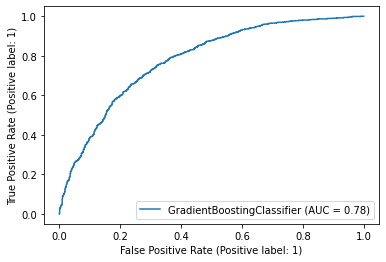

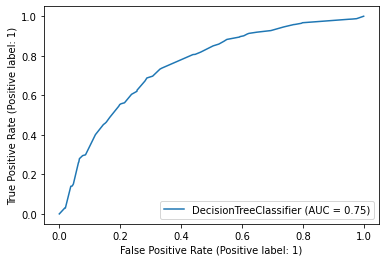

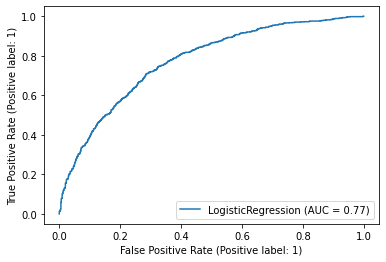

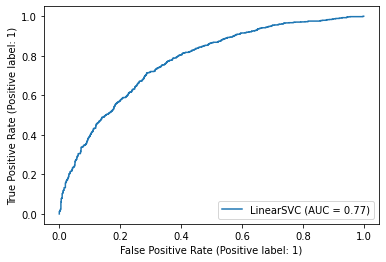

In [155]:
# plot using the curve that minimizes false negatives
metrics.plot_roc_curve(GBC_best, X_test, y_test)

metrics.plot_roc_curve(DTC_best, X_test, y_test)

metrics.plot_roc_curve(glm_best, X_test_scaled, y_test)

metrics.plot_roc_curve(linear_svm10k, X_test_scaled, y_test)



In [156]:
GBC_best.feature_importances_

array([0.01272033, 0.00168461, 0.00332994, 0.00981336, 0.00414599,
       0.01137595, 0.12703523, 0.1227697 , 0.25924697, 0.04281443,
       0.32970678, 0.07535671])

In [157]:
DTC_best.feature_importances_

array([0.        , 0.01494956, 0.00459781, 0.00264432, 0.00569003,
       0.00782119, 0.12859418, 0.14133159, 0.24276618, 0.04550869,
       0.32144096, 0.08465549])

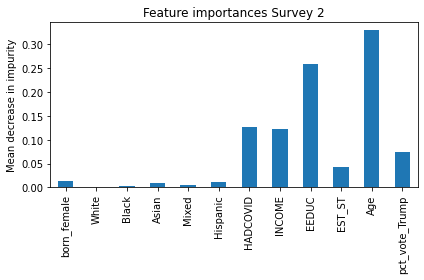

In [164]:

importances = GBC_best.feature_importances_

feature_names = ['born_female',	'White',	'Black',	'Asian',	'Mixed',
                 'Hispanic',	'HADCOVID',	'INCOME',	'EEDUC',	'EST_ST',
                 'Age',	'pct_vote_Trump']
GBC_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
GBC_importances.plot.bar(ax=ax)
ax.set_title("Feature importances Survey 2")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Visualize Classification

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


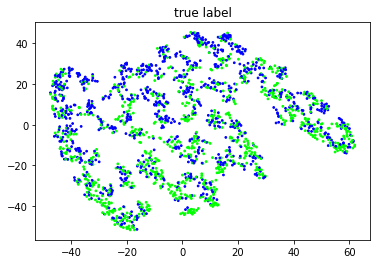

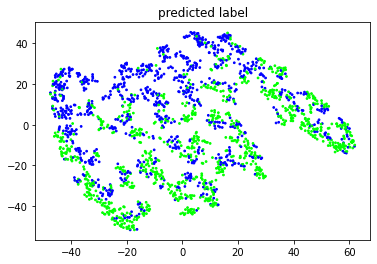

In [165]:
# embed to 2-dim space
X_test_emb = TSNE().fit_transform(X_test)

# color map for each label
cmap = get_cmap('brg', 2)

# plot with each class being the same color
plt.scatter(X_test_emb[:,0], X_test_emb[:,1], s=3, color=cmap(y_test))
plt.title('true label')
plt.show()

pred = GBC_best.predict(X_test)

plt.scatter(X_test_emb[:,0], X_test_emb[:,1], s=3, color=cmap(pred))
plt.title('predicted label')
plt.show()

# Survey 3

In [166]:
from google.colab import files
data_to_load = files.upload()

Saving pulse2021_puf_35.csv to pulse2021_puf_35.csv


In [183]:
import io
df_pulse2 = pd.read_csv(io.BytesIO(data_to_load['pulse2021_puf_35.csv']))

In [184]:
# cleaning

# create dummy variable for already vaccinated
df_one = pd.get_dummies(df_pulse2['RECVDVACC'], prefix = 'received_vacc')
 
# Binary Data is Concatenated into Dataframe
df_pulse2 = pd.concat((df_one, df_pulse2), axis=1)

df_pulse2 = df_pulse2.rename(columns={'received_vacc_2': 'not_vaccinated'})


# replace missing values with NAN

df_pulse2 = df_pulse2.replace({-99: None, -88: None})



# remove rows by filtering out missing responses for target variable:
# vaccine hesitancy
df_pulse2 = df_pulse2[(df_pulse2['GETVACRV'] != None)]

# remove those who did not respond regarding how hesitant

df_pulse2 = df_pulse2[df_pulse2['not_vaccinated'] != None]

# Classify vaccine hesitant for anything other than definitely getting a vaccine
# include the vaccinated 


df_pulse2['GETVACRV'] = np.where(df_pulse2['GETVACRV'] > 1.5, 1, 0) 

df_pulse2 = df_pulse2.rename(columns={'GETVACRV' : 'vacc_hesitant'})

df_pulse2['vacc_hesitant'] = np.where(df_pulse2.not_vaccinated == 1, 1, 0) 



# use a bare bones model
df_bare_bones = df_pulse2[minimal_feature_list]


# remove all rows containing NAs

df_bare_bones = df_bare_bones.dropna()


# change birth year to age
df_bare_bones['Age'] = 2021 - df_bare_bones['TBIRTH_YEAR']

df_bare_bones.drop(columns=['TBIRTH_YEAR'], axis=1, inplace= True)


# create dummy variable for hispanic
df_two = pd.get_dummies(df_bare_bones['RHISPANIC'], drop_first= True,
                        prefix = 'hisp')
 
# Binary Data is Concatenated into Dataframe
df_bare_bones = pd.concat((df_two, df_bare_bones), axis=1)

df_bare_bones = df_bare_bones.rename(columns={'hisp_2' : 'Hispanic'})

df_bare_bones.drop(columns=['RHISPANIC'], axis=1, inplace= True)



# create dummies for each race
df_three = pd.get_dummies(df_bare_bones['RRACE'], prefix= 'race')

# Binary Data is Concatenated into Dataframe
df_bare_bones = pd.concat((df_three, df_bare_bones), axis=1)

df_bare_bones = df_bare_bones.rename(columns={'race_1' : 'White', 'race_2' : 'Black',
                                    'race_3': 'Asian', 'race_4': 'Mixed'})

df_bare_bones.drop(columns=['RRACE'], axis=1, inplace= True)


# create dummy variable for birth gender
df_five = pd.get_dummies(df_bare_bones['EGENID_BIRTH'], drop_first= True,
                        prefix = 'bfemale')
 
# Binary Data is Concatenated into Dataframe
df_bare_bones = pd.concat((df_five, df_bare_bones), axis=1)

df_bare_bones = df_bare_bones.rename(columns={'bfemale_2' : 'born_female'})

df_bare_bones.drop(columns=['EGENID_BIRTH'], axis=1, inplace= True)

# create a dummy variable for had COVID-19 in the past

df_bare_bones['HADCOVID'] = np.where(df_bare_bones.HADCOVID < 1.5, 1, 0) 

# assign political affiliation using previously defined function
df_bare_bones['pct_vote_Trump'] = df_bare_bones['EST_ST'].apply(politics)







In [185]:
#indices corresponding to fraud transaction
hesitant_indices = np.array(df_bare_bones[df_bare_bones.vacc_hesitant == 1].index) 
#indices corresponding to genuine transaction
not_hesitant_ind = df_bare_bones[df_bare_bones.vacc_hesitant == 0].index
# total vaccine hesitant people
total_hesitant = len(df_bare_bones[df_bare_bones.vacc_hesitant == 1]) 
np.random.seed(0) # fix the random seed generator for consistent results
# down sample
not_hesitant_ind = np.random.choice(not_hesitant_ind, total_hesitant, replace = False)
not_hesitant_ind = np.array(not_hesitant_ind)
 # indices for balanced data
selected_balanced_indices = np.concatenate([not_hesitant_ind,hesitant_indices])
df_bare_bones = df_bare_bones.loc[selected_balanced_indices]



In [186]:
# Store all the features from the data in X
X= df_bare_bones.iloc[:, np.r_[0:10, 11:13]]
# Store all the labels in y
y = df_bare_bones['vacc_hesitant']

X = X.to_numpy()
y = y.to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,
                                                 random_state=5 )

X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size = 0.2,
                                                 random_state=5 )

## Decision Tree Classifier

In [187]:

for k in [1,3,5,7,9]:
  DTC = DecisionTreeClassifier(criterion='entropy', random_state=5,
                                       max_depth=k)
  DTC_fitted = DTC.fit(X_train, y_train)
  y_pred_train = DTC_fitted.predict(X_train)
  y_pred_test = DTC_fitted.predict(X_val)
  print('depth %i train accuracy: %.4f' %(k,accuracy_score(y_train,y_pred_train)))
  print('depth %i test accuracy: %.4f' %(k,accuracy_score(y_val,y_pred_test)))


depth 1 train accuracy: 0.6518
depth 1 test accuracy: 0.6463
depth 3 train accuracy: 0.6969
depth 3 test accuracy: 0.6983
depth 5 train accuracy: 0.7199
depth 5 test accuracy: 0.7102
depth 7 train accuracy: 0.7392
depth 7 test accuracy: 0.7021
depth 9 train accuracy: 0.7658
depth 9 test accuracy: 0.6950


In [188]:
DTC_best = DecisionTreeClassifier(criterion='entropy', random_state=5,
                                       max_depth=5)
DTC_best.fit(X_train, y_train)
DTC_best.score(X_test, y_test)

0.6845753899480069

In [189]:

tn, fp, fn, tp = confusion_matrix(y_test, DTC_best.predict(X_test)).ravel()
(tn, fp, fn, tp)

(693, 240, 295, 618)

## Random Forest Classifier

In [190]:
for k in [10,100,500,1000,2000]:
  RFC = RandomForestClassifier(n_estimators = k, criterion = 'entropy',
                               random_state = 5)
  RFC_fitted = RFC.fit(X_train, y_train)
  y_pred_train = RFC_fitted.predict(X_train)
  y_pred_test = RFC_fitted.predict(X_val)
  print('%i estimators train accuracy: %.4f' %(k,accuracy_score(y_train,y_pred_train)))
  print('%i estimators test accuracy: %.4f' %(k,accuracy_score(y_val,y_pred_test)))


10 estimators train accuracy: 0.9774
10 estimators test accuracy: 0.6717
100 estimators train accuracy: 0.9959
100 estimators test accuracy: 0.7010
500 estimators train accuracy: 0.9959
500 estimators test accuracy: 0.7010
1000 estimators train accuracy: 0.9959
1000 estimators test accuracy: 0.7026
2000 estimators train accuracy: 0.9959
2000 estimators test accuracy: 0.6999


In [191]:
RFC_best = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy',
                               random_state = 5)

RFC_best.fit(X_train, y_train)

RFC_best.score(X_test, y_test)

0.6676776429809359

In [192]:
tn, fp, fn, tp = confusion_matrix(y_test, RFC_best.predict(X_test)).ravel()
(tn, fp, fn, tp)

(640, 293, 256, 657)

## Gradient Boosting Classifier

In [193]:
for k in [1,5,50,100,200,400]:
  GBC = GradientBoostingClassifier(n_estimators = k, n_iter_no_change = 100, 
                                   validation_fraction=0.2,  random_state = 5)
  GBC_fitted = GBC.fit(X_train, y_train)
  y_pred_train = GBC_fitted.predict(X_train)
  y_pred_test = GBC_fitted.predict(X_val)
  print('%i estimators train accuracy: %.4f' %(k,accuracy_score(y_train,y_pred_train)))
  print('%i estimators test accuracy: %.4f' %(k,accuracy_score(y_val,y_pred_test)))


1 estimators train accuracy: 0.6895
1 estimators test accuracy: 0.6863
5 estimators train accuracy: 0.6965
5 estimators test accuracy: 0.6934
50 estimators train accuracy: 0.7296
50 estimators test accuracy: 0.7216
100 estimators train accuracy: 0.7361
100 estimators test accuracy: 0.7205
200 estimators train accuracy: 0.7412
200 estimators test accuracy: 0.7199
400 estimators train accuracy: 0.7412
400 estimators test accuracy: 0.7199


In [194]:
GBC_best = GradientBoostingClassifier(n_estimators = 100, n_iter_no_change = 100, 
                                   validation_fraction=0.2,  random_state = 5)

GBC_best.fit(X_train, y_train)

GBC_best.score(X_test, y_test)

0.7049393414211439

In [195]:
tn, fp, fn, tp = confusion_matrix(y_test, GBC_best.predict(X_test)).ravel()
(tn, fp, fn, tp)

(819, 378, 303, 808)

## KNN

In [196]:
for k in [1,3,5,10,25,50,100]:
  NN = KNeighborsClassifier(n_neighbors= k)
  NN_fitted = NN.fit(X_train, y_train)
  y_pred_train = NN_fitted.predict(X_train)
  y_pred_test = NN_fitted.predict(X_val)
  print('%i estimators train accuracy: %.4f' %(k,accuracy_score(y_train,y_pred_train)))
  print('%i estimators test accuracy: %.4f' %(k,accuracy_score(y_val,y_pred_test)))



1 estimators train accuracy: 0.9959
1 estimators test accuracy: 0.5975
3 estimators train accuracy: 0.8149
3 estimators test accuracy: 0.6306
5 estimators train accuracy: 0.7707
5 estimators test accuracy: 0.6728
10 estimators train accuracy: 0.7240
10 estimators test accuracy: 0.6815
25 estimators train accuracy: 0.7000
25 estimators test accuracy: 0.6993
50 estimators train accuracy: 0.6952
50 estimators test accuracy: 0.6891
100 estimators train accuracy: 0.6824
100 estimators test accuracy: 0.6788


## Weighted KNN

In [197]:
for k in [1,3,5,10,25,50,100]:
  WNN = KNeighborsClassifier(n_neighbors= k, weights='distance')
  WNN_fitted = WNN.fit(X_train, y_train)
  y_pred_train = WNN_fitted.predict(X_train)
  y_pred_test = WNN_fitted.predict(X_val)
  print('%i estimators train accuracy: %.4f' %(k,accuracy_score(y_train,y_pred_train)))
  print('%i estimators test accuracy: %.4f' %(k,accuracy_score(y_val,y_pred_test)))


1 estimators train accuracy: 0.9959
1 estimators test accuracy: 0.5975
3 estimators train accuracy: 0.9959
3 estimators test accuracy: 0.6295
5 estimators train accuracy: 0.9959
5 estimators test accuracy: 0.6696
10 estimators train accuracy: 0.9959
10 estimators test accuracy: 0.6853
25 estimators train accuracy: 0.9959
25 estimators test accuracy: 0.6950
50 estimators train accuracy: 0.9959
50 estimators test accuracy: 0.6928
100 estimators train accuracy: 0.9959
100 estimators test accuracy: 0.6793


In [198]:
NN_best = KNeighborsClassifier(n_neighbors= 25)

NN_best.fit(X_train, y_train)

NN_best.score(X_test, y_test)

0.665944540727903

In [199]:
tn, fp, fn, tp = confusion_matrix(y_test, NN_best.predict(X_test)).ravel()
(tn, fp, fn, tp)

(651, 282, 273, 640)

## Logistic Classifier

In [200]:
# pre-process the data
# Define the scaler for scaling the data
scaler = preprocessing.StandardScaler().fit(X_train)

# Normalize the training data
X_train_scaled = scaler.transform(X_train)

# Use the scaler defined above to standardize the validation data by applying
# the same transformation to the validation data.
X_val_scaled = scaler.transform(X_val)


glm = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

# define search
search = RandomizedSearchCV(glm, space, n_iter=500, scoring='accuracy',
                            n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: 0.7115377676006507
Best Hyperparameters: {'C': 0.8406571615325142, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3540 fits failed out of a total of 7500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
795 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [201]:
glm_best = LogisticRegression(penalty = 'l2', solver = 'lbfgs')

glm_best.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

glm_best.score(X_test_scaled, y_test)


0.7049393414211439

In [202]:
tn, fp, fn, tp = confusion_matrix(y_test, glm_best.predict(X_test_scaled)).ravel()
(tn, fp, fn, tp)

(835, 362, 319, 792)

## SVM

In [203]:
linear_svm10k = LinearSVC(max_iter= 10000)
linear_svm10k.fit(X_train_scaled, y_train)
linear_svm10k.score(X_train_scaled, y_train)

0.7099133261105092

In [204]:
linear_svm10k.score(X_val_scaled, y_val)

0.7015167930660888

In [205]:
linear_svm100k = LinearSVC(max_iter= 100000)
linear_svm100k.fit(X_train_scaled, y_train)
linear_svm100k.score(X_train_scaled, y_train)

0.7099133261105092

In [206]:
linear_svm100k.score(X_val_scaled, y_val)

0.7015167930660888

In [207]:
linear_svm10k.score(X_test_scaled, y_test)

0.7036395147313691

## ROC Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

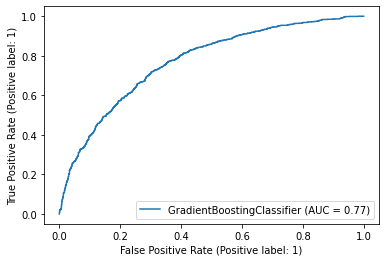

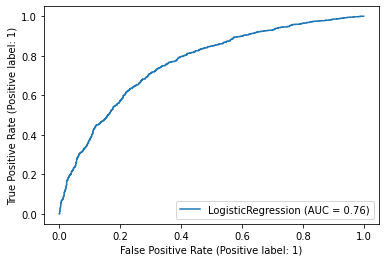

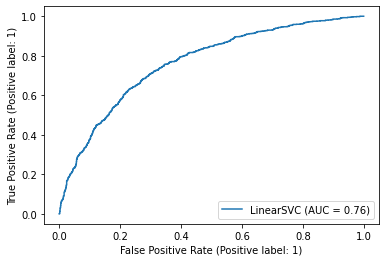

In [210]:
# plot using the curve that minimizes false negatives
metrics.plot_roc_curve(GBC_best, X_test, y_test) 

metrics.plot_roc_curve(glm_best, X_test_scaled, y_test)

metrics.plot_roc_curve(linear_svm10k, X_test_scaled, y_test)

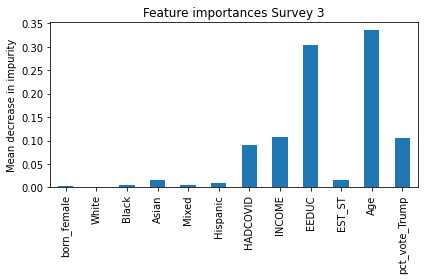

In [211]:
importances = GBC_best.feature_importances_

feature_names = ['born_female',	'White',	'Black',	'Asian',	'Mixed',
                 'Hispanic',	'HADCOVID',	'INCOME',	'EEDUC',	'EST_ST',
                 'Age',	'pct_vote_Trump']
GBC_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
GBC_importances.plot.bar(ax=ax)
ax.set_title("Feature importances Survey 3")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Visualizing High Dimensional Data

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


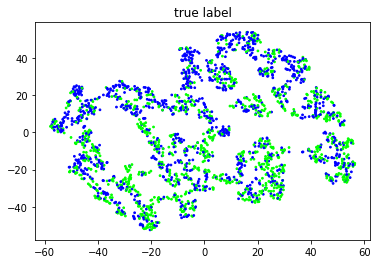

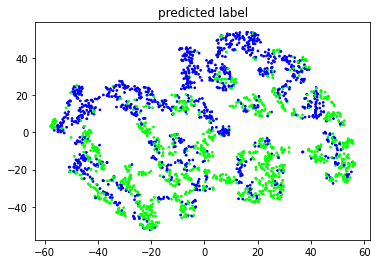

In [209]:
# embed to 2-dim space
X_test_emb = TSNE().fit_transform(X_test)

# color map for each label
cmap = get_cmap('brg', 2)

# plot with each class being the same color
plt.scatter(X_test_emb[:,0], X_test_emb[:,1], s=3, color=cmap(y_test))
plt.title('true label')
plt.show()

pred = GBC_best.predict(X_test)

plt.scatter(X_test_emb[:,0], X_test_emb[:,1], s=3, color=cmap(pred))
plt.title('predicted label')
plt.show()

## SML 310 Final Project Ends Here

# Data Imputation for Full Feature Model

In [ ]:
# import KNN imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights = 'distance')

# preform data imputation with KNN imputer
df_pulse[:] = imputer.fit_transform(df_pulse)


In [ ]:
df_pulse

# Cleaning Descriptive Features

In [ ]:
# change birth year to age
df_pulse['Age'] = 2021 - df_pulse['TBIRTH_YEAR']

#df_pulse.drop(['TBIRTH_YEAR'])

In [ ]:
# create dummy variable for hispanic
df_two = pd.get_dummies(df_pulse['RHISPANIC'], drop_first= True, prefix = 'hisp')
 
# Binary Data is Concatenated into Dataframe
df_pulse = pd.concat((df_two, df_pulse), axis=1)

df_pulse = df_pulse.rename(columns={'hisp_2.0' : 'Hispanic'})

#df_pulse.drop(['RHISPANIC'])

df_pulse



In [ ]:
# create dummies for each race
df_three = pd.get_dummies(df_pulse['RRACE'], prefix= 'race')

# Binary Data is Concatenated into Dataframe
df_pulse = pd.concat((df_three, df_pulse), axis=1)

df_pulse = df_pulse.rename(columns={'race_1.0' : 'White', 'race_2.0' : 'Black',
                                    'race_3.0': 'Asian', 'race_4.0': 'Mixed'})

#df_pulse.drop(['RRACE'])
df_pulse

In [ ]:
# create dummy variable for birth gender
df_five = pd.get_dummies(df_pulse['EGENID_BIRTH'], drop_first= True,
                        prefix = 'bfemale')
 
# Binary Data is Concatenated into Dataframe
df_pulse = pd.concat((df_five, df_pulse), axis=1)

df_pulse = df_pulse.rename(columns={'bfemale_2.0' : 'born_female'})

#df_pulse.drop(['EGENID_BIRTH'])

df_pulse

In [ ]:
# create dummy variable for gender identity
df_six = pd.get_dummies(df_pulse['GENID_DESCRIBE'], prefix = 'gender')
 
# Binary Data is Concatenated into Dataframe
df_pulse = pd.concat((df_six, df_pulse), axis=1)

df_pulse = df_pulse.rename(columns={'gender_1': 'genID_male', 
                                    'gender_2' : 'genID_female',
                                    'gender_3': 'gendID_trans',
                                    'gender_4': 'gendID_other'})

df_pulse

In [ ]:
# create dummy variable for sexual orientation
df_seven = pd.get_dummies(df_pulse['SEXUAL_ORIENTATION'], prefix = 'orientation')
 
# Binary Data is Concatenated into Dataframe
df_pulse = pd.concat((df_seven, df_pulse), axis=1)

df_pulse = df_pulse.rename(columns={'orientation_1': 'gay', 
                                    'orientation_2' : 'straight',
                                    'orientation_3': 'bisexual',
                                    'orientation_4': 'sexual_orientation_other',
                                    'orientation_5': 'sexual_orientation_unsure'})

df_pulse

In [ ]:
# create dummy variable for having already contracted COVID-19
# set unsure to not having had covid

df_pulse['HADCOVID'] = np.where(df_pulse.HADCOVID < 1.5, 1, 0) 



df_pulse

In [ ]:
# create dummy variable for household work loss

df_pulse['WRKLOSSRV'] = np.where(df_pulse.WRKLOSSRV < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'WRKLOSSRV': 'work_loss'})

df_pulse

In [ ]:
# create dummy variable for household work loss

df_pulse['ANYWORK'] = np.where(df_pulse.ANYWORK > 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'ANYWORK': 'unemployed'})

df_pulse

In [ ]:
# create dummy variable for child tax credit use

df_pulse['CTC_YN'] = np.where(df_pulse.CTC_YN < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'CTC_YN': 'CTC_yes'})

df_pulse

In [ ]:
df_pulse['ACTIVITY1'] = np.where(df_pulse.ACTIVITY1 < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'ACTIVTY1': 'wrk_inperson'})

In [ ]:
df_pulse['ACTIVITY2'] = np.where(df_pulse.ACTIVITY2 < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'ACTIVITY2': 'telewrk'})

In [ ]:
df_pulse['ACTIVITY3'] = np.where(df_pulse.ACTIVITY3 < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'ACTIVITY3': 'in_store_shop'})

In [ ]:
df_pulse['ACTIVITY4'] = np.where(df_pulse.ACTIVITY4 < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'ACTIVITY4': 'restaurant_indoor'})

In [ ]:
df_pulse['ACTIVITY5'] = np.where(df_pulse.ACTIVITY5 < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'ACTIVITY5': 'inperson_med'})

In [ ]:
df_pulse['ACTIVITY6'] = np.where(df_pulse.ACTIVITY6 < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'ACTIVITY6': 'in_home_help'})

In [ ]:
df_pulse['SNAP_YN'] = np.where(df_pulse.SNAP_YN < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'SNAP_YN': 'SNAP'})

In [ ]:
df_pulse['PRESCRIPT'] = np.where(df_pulse.PRESCRIPT < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'PRESCRIPT': 'prescr_mentlhlth'})

In [ ]:
df_pulse['MH_SVCS'] = np.where(df_pulse.MH_SVCS < 1.5, 1, 0)

In [ ]:
df_pulse['HLTHINS1'] = np.where(df_pulse.HLTHINS1 < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'HLTHINS1': 'hlthins_employer'})

In [ ]:
df_pulse['HLTHINS2'] = np.where(df_pulse.HLTHINS2 < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'HLTHINS2': 'hlthins_mkt'})

In [ ]:
df_pulse['HLTHINS3'] = np.where(df_pulse.HLTHINS3 < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'HLTHINS3': 'medicare'})

In [ ]:
df_pulse['HLTHINS4'] = np.where(df_pulse.HLTHINS4 < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'HLTHINS4': 'medicaid'})

In [ ]:
df_pulse['HLTHINS5'] = np.where(df_pulse.HLTHINS5 < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'HLTHINS5': 'hlthins_military'})

In [ ]:
df_pulse['HLTHINS6'] = np.where(df_pulse.HLTHINS6 < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'HLTHINS6': 'hlthins_VA'})

In [ ]:
df_pulse['HLTHINS7'] = np.where(df_pulse.HLTHINS7 < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'HLTHINS7': 'hlthins_IHS'})

In [ ]:
df_pulse['HLTHINS8'] = np.where(df_pulse.HLTHINS8 < 1.5, 1, 0)

df_pulse = df_pulse.rename(columns={'HLTHINS8': 'hlthins_other'})

In [ ]:
df_pulse['TELEHLTH'] = np.where(df_pulse.TELEHLTH < 1.5, 1, 0)



In [ ]:
df_pulse['RENTCUR'] = np.where(df_pulse.RENTCUR < 1.5, 1, 0)

In [ ]:
df_pulse['MORTCUR'] = np.where(df_pulse.MORTCUR < 1.5, 1, 0)

In [ ]:
df_pulse